In [ ]:
pip install yahoo-fin

In [ ]:
pip install FinRatioAnalysis

In [ ]:
pip install investpy

In [4]:
from FinRatioAnalysis import FinRatioAnalysis
import os
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si
import investpy as ip

In [5]:
ticker = 'IBM' 

In [6]:
ra = FinRatioAnalysis(ticker)

In [7]:
balance_sheet = ra.BalanceSheet.transpose()
balance_sheet

Breakdown,intangibleAssets,totalLiab,totalStockholderEquity,minorityInterest,deferredLongTermLiab,otherCurrentLiab,totalAssets,commonStock,otherCurrentAssets,retainedEarnings,otherLiab,goodWill,treasuryStock,otherAssets,cash,totalCurrentLiabilities,deferredLongTermAssetCharges,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable,shortLongTermDebt
endDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,1.251100e+10,1.130050e+11,1.890100e+10,95000000.0,9.240000e+08,2.190300e+10,1.320010e+11,5.731900e+10,1.404000e+09,1.542090e+11,3.200700e+10,5.564300e+10,-1.926270e+11,1.814400e+10,6.650000e+09,3.361900e+10,7.370000e+09,-2.323500e+10,8.916000e+09,2.953900e+10,1.823000e+09,-4.925300e+10,600000000.0,7.756000e+09,4.491700e+10,1.649000e+09,3.955000e+09,NaN
2020-12-31,1.379600e+10,1.352450e+11,2.059700e+10,129000000.0,2.449000e+09,1.692500e+10,1.559710e+11,5.655600e+10,2.655000e+09,1.627170e+11,3.744700e+10,5.961700e+10,-1.986760e+11,2.135500e+10,1.321200e+10,3.986900e+10,9.241000e+09,-2.933700e+10,1.472600e+10,3.916500e+10,2.260000e+08,-5.281600e+10,600000000.0,8.343000e+09,5.415600e+10,1.839000e+09,4.908000e+09,6.956000e+09
2019-12-31,1.523500e+10,1.312010e+11,2.084100e+10,144000000.0,2.472000e+09,1.525900e+10,1.521860e+11,5.589500e+10,2.212000e+09,1.629540e+11,3.551900e+10,5.822200e+10,-1.980080e+11,1.636900e+10,8.172000e+09,3.770100e+10,5.182000e+09,-2.859500e+10,1.500600e+10,3.842000e+10,2.220000e+08,-5.261600e+10,696000000.0,1.006900e+10,5.395100e+10,1.619000e+09,4.896000e+09,7.470000e+09
2018-12-31,3.087000e+09,1.064520e+11,1.679600e+10,134000000.0,2.676000e+09,1.465900e+10,1.233820e+11,5.515100e+10,2.911000e+09,1.592060e+11,3.262000e+10,3.626500e+10,-1.975610e+11,1.471800e+10,1.137900e+10,3.822700e+10,5.216000e+09,-2.949000e+10,1.079200e+10,4.914600e+10,2.260000e+08,-2.255600e+10,618000000.0,8.645000e+09,3.556700e+10,1.682000e+09,6.558000e+09,7.048000e+09


In [8]:
income_statement = ra.IncomeSatement.transpose()
income_statement

Breakdown,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,otherOperatingExpenses,interestExpense,extraordinaryItems,nonRecurring,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares
endDate,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,6488000000,None,4837000000,95000000,5743000000,20027000000,31486000000,5583000000,5583000000,-612000000,-1155000000,None,None,None,124000000,57350000000,51767000000,25864000000,-746000000,1030000000,4713000000,5743000000
2020-12-31,6333000000,None,4637000000,129000000,5590000000,21242000000,35575000000,8584000000,8584000000,-584000000,-1288000000,None,None,None,-864000000,73621000000,65037000000,38046000000,-3947000000,89000000,5501000000,5590000000
2019-12-31,5936000000,None,10166000000,144000000,9431000000,20382000000,36489000000,10785000000,10785000000,-614000000,-1344000000,None,None,None,731000000,77147000000,66362000000,40658000000,-619000000,-4000000,9435000000,9431000000
2018-12-31,5379000000,None,11342000000,134000000,8728000000,19366000000,36937000000,13218000000,13218000000,-1026000000,-723000000,None,None,None,2619000000,79591000000,66373000000,42654000000,-1876000000,5000000,8723000000,8728000000


In [9]:
search_result = ip.search_quotes(text= ticker, products=['stocks'],
                                       countries=['united states'], n_results=1)
print(search_result)

{"id_": 8082, "name": "International Business Machines", "symbol": "IBM", "country": "united states", "tag": "/equities/ibm", "pair_type": "stocks", "exchange": "NYSE"}


**X_1**

In [10]:
work_cap = np.subtract(balance_sheet.totalCurrentAssets, 
                       balance_sheet.totalCurrentLiabilities)
x_1 = np.divide(work_cap, balance_sheet.totalAssets)
X_1 = x_1.iloc[0,]
X_1

-0.03090885675108522

**X_2**

In [11]:
X_2 =  np.divide(balance_sheet.retainedEarnings, 
                 balance_sheet.totalAssets)
X_2 = X_2.iloc[0,]
X_2

1.1682411496882599

**X_3**

In [12]:
X_3 = np.divide(income_statement.ebit,
                balance_sheet.totalAssets)
X_3.sort_values(axis=0, ascending=True, inplace=True)
X_3 = X_3.iloc[0,]
X_3

0.04229513412777176

**X_4**


In [13]:
information = search_result.retrieve_information()
information = pd.DataFrame.from_dict(information, orient='index')
market_cap = information.loc['marketCap',]
market_cap = market_cap.astype(float)
market_cap

0    1.115200e+11
Name: marketCap, dtype: float64

In [14]:
 X_4 = np.divide(market_cap, balance_sheet.totalLiab.iloc[0,])
 X_4

0    0.986859
Name: marketCap, dtype: float64

#**X_5**


In [15]:
X_5 = np.divide(income_statement.totalRevenue, balance_sheet.totalAssets)
X_5.sort_values(axis=0, ascending=True, inplace=True)
X_5 = X_5.iloc[0,]
X_5

0.43446640555753363

# **Z_Score**

In [20]:
Z_score = 1.2*X_1 + 1.4*X_2 + 3.3*X_3 + .6*X_4 + .99*X_5
print('Altman Z-Score =', Z_score.values)

Altman Z-Score = [2.76025806]


In [17]:
if Z_score.values <= 1.8 :
  print('Distress Zone =', Z_score.values)  
elif Z_score.values >= 3:
  print('Safe Zone =', Z_score.values)
else:
  print('Grey Zone =', Z_score.values)

Grey Zone = [2.76025806]


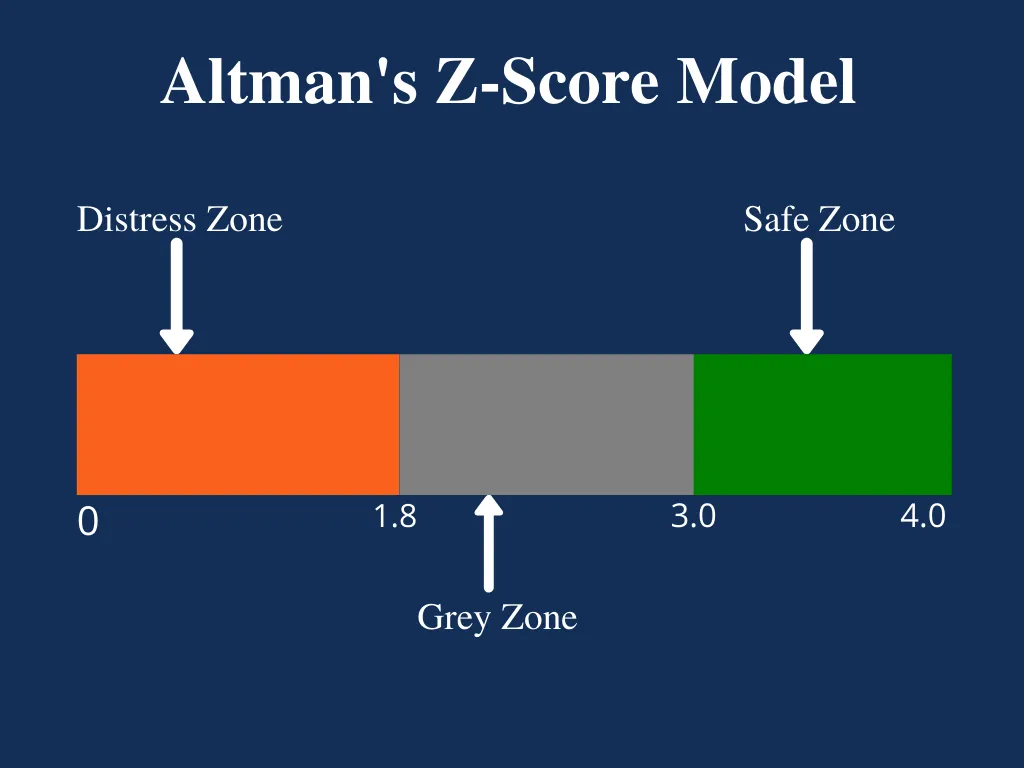